## Part 1: Setup and Data Loading

In [18]:
# Import necessary libraries
from pathlib import Path
import re
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [22]:
# Define data paths (matching main analysis notebook)
DATA_DIR = Path("../data")
BOOK1_PATH = DATA_DIR / "As a man thinketh.txt"
BOOK2_PATH = DATA_DIR / "The way of Peace.txt"

# Load books
def load_text(filepath):
    """Load text file and return contents."""
    if not filepath.exists():
        raise FileNotFoundError(f"File not found: {filepath}")
    with open(filepath, 'r', encoding='utf-8', errors='ignore') as f:
        return f.read()

book1_raw = load_text(BOOK1_PATH)
book2_raw = load_text(BOOK2_PATH)

# Remove Project Gutenberg header/footer markers
def strip_gutenberg_markers(text):
    """Remove Project Gutenberg header and footer if present."""
    start_re = re.compile(r'\*\*\*\s*START OF (THE|THIS) PROJECT GUTENBERG.*?\*\*\*', re.IGNORECASE | re.DOTALL)
    end_re = re.compile(r'\*\*\*\s*END OF (THE|THIS) PROJECT GUTENBERG.*?\*\*\*', re.IGNORECASE | re.DOTALL)
    start_match = start_re.search(text)
    end_match = end_re.search(text)
    start = start_match.end() if start_match else 0
    end = end_match.start() if end_match else len(text)
    return text[start:end].strip()

book1_raw = strip_gutenberg_markers(book1_raw)
book2_raw = strip_gutenberg_markers(book2_raw)

print(f"📖 Book 1 'As a Man Thinketh': {len(book1_raw):,} characters")
print(f"📖 Book 2 'The Way of Peace': {len(book2_raw):,} characters")

# Data normalization and tokenization (used throughout analysis)
import string
def normalize_and_tokenize(text):
    """Lowercase, remove punctuation, and tokenize."""
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = re.findall(r'\b[a-z]{2,}\b', text)
    return tokens
book1_tokens = normalize_and_tokenize(book1_raw)
book2_tokens = normalize_and_tokenize(book2_raw)
print(f"Book 1 tokens: {len(book1_tokens):,} | Unique: {len(set(book1_tokens)):,}")
print(f"Book 2 tokens: {len(book2_tokens):,} | Unique: {len(set(book2_tokens)):,}")

📖 Book 1 'As a Man Thinketh': 44,852 characters
📖 Book 2 'The Way of Peace': 100,327 characters
Book 1 tokens: 7,404 | Unique: 1,768
Book 2 tokens: 17,023 | Unique: 2,751


## Part 2: Text Preview and Structure
2

In [23]:
# Preview first 500 characters of each book
print("="*80)
print("BOOK 1 PREVIEW:")
print("="*80)
print(book1_raw[:500])
print("\n" + "="*80)
print("BOOK 2 PREVIEW:")
print("="*80)
print(book2_raw[:500])

BOOK 1 PREVIEW:
Produced by Charles Aldarondo.  HTML version by Al Haines.










AS A MAN THINKETH


BY

JAMES ALLEN


Author of "From Passion to Peace"



  _Mind is the Master power that moulds and makes,
  And Man is Mind, and evermore he takes
  The tool of Thought, and, shaping what he wills,
  Brings forth a thousand joys, a thousand ills:--
  He thinks in secret, and it comes to pass:
  Environment is but his looking-glass._



Authorized Edition

New York





CONTENTS


THOUGHT AND CHARACTER

EFFEC

BOOK 2 PREVIEW:
THE WAY OF PEACE


BY JAMES ALLEN


AUTHOR OF "AS A MAN THINKETH," "OUT FROM THE HEART"




CONTENTS


THE POWER OF MEDITATION

THE TWO MASTERS, SELF AND TRUTH

THE ACQUIREMENT OF SPIRITUAL POWER

THE REALIZATION OF SELFLESS LOVE

ENTERING INTO THE INFINITE

SAINTS, SAGES, AND SAVIORS; THE LAW OF SERVICE

THE REALIZATION OF PERFECT PEACE




THE POWER OF MEDITATION


Spiritual meditation is the pathway to Divinity. It is the mystic ladder
which reaches from eart

In [24]:
import string

def normalize_and_tokenize(text):
    """Lowercase, remove punctuation, and tokenize."""
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = re.findall(r'\b[a-z]{2,}\b', text)
    return tokens

book1_tokens = normalize_and_tokenize(book1_raw)
book2_tokens = normalize_and_tokenize(book2_raw)

print(f'Book 1 tokens: {len(book1_tokens):,} | Unique: {len(set(book1_tokens)):,}')
print(f'Book 2 tokens: {len(book2_tokens):,} | Unique: {len(set(book2_tokens)):,}')

Book 1 tokens: 7,404 | Unique: 1,768
Book 2 tokens: 17,023 | Unique: 2,751


## Part 3: Basic Text Statistics

In [25]:
def text_statistics(text, book_name):
    """Calculate comprehensive text statistics."""
    # Character counts
    total_chars = len(text)
    alphabetic_chars = sum(c.isalpha() for c in text)
    spaces = sum(c.isspace() for c in text)
    
    # Line counts
    lines = text.split('\n')
    non_empty_lines = [line for line in lines if line.strip()]
    
    # Word counts (simple)
    words = re.findall(r'\b[a-zA-Z]+\b', text)
    
    # Sentence approximation (period, exclamation, question mark)
    sentences = re.split(r'[.!?]+', text)
    sentences = [s for s in sentences if s.strip()]
    
    stats = {
        'Book': book_name,
        'Total Characters': total_chars,
        'Alphabetic Characters': alphabetic_chars,
        'Whitespace Characters': spaces,
        'Total Lines': len(lines),
        'Non-Empty Lines': len(non_empty_lines),
        'Total Words': len(words),
        'Unique Words': len(set(w.lower() for w in words)),
        'Approximate Sentences': len(sentences),
        'Avg Words per Sentence': len(words) / max(1, len(sentences)),
        'Avg Word Length': np.mean([len(w) for w in words])
    }
    
    return stats

# Calculate statistics for both books
stats1 = text_statistics(book1_raw, "As a Man Thinketh")
stats2 = text_statistics(book2_raw, "The Way of Peace")

# Create comparison DataFrame
df_stats = pd.DataFrame([stats1, stats2]).set_index('Book')
print("\n📊 COMPREHENSIVE TEXT STATISTICS:")
print("="*80)
print(df_stats.T)
print("="*80)


📊 COMPREHENSIVE TEXT STATISTICS:
Book                    As a Man Thinketh  The Way of Peace
Total Characters             44852.000000     100327.000000
Alphabetic Characters        35758.000000      79083.000000
Whitespace Characters         7819.000000      18551.000000
Total Lines                    945.000000       1831.000000
Non-Empty Lines                753.000000       1552.000000
Total Words                   7608.000000      17316.000000
Unique Words                  1748.000000       2714.000000
Approximate Sentences          287.000000        581.000000
Avg Words per Sentence          26.508711         29.803787
Avg Word Length                  4.674553          4.562948


## Part 4: Vocabulary Diversity Analysis

In [26]:
# Use normalized tokens from earlier
book1_words = book1_tokens
book2_words = book2_tokens

# Calculate lexical diversity metrics
def lexical_diversity(words):
    """Calculate Type-Token Ratio (TTR) and related metrics."""
    total_words = len(words)
    unique_words = len(set(words))
    
    # Type-Token Ratio
    ttr = unique_words / total_words if total_words > 0 else 0
    
    # Standardized TTR (first 1000 words)
    sttr = len(set(words[:1000])) / 1000 if len(words) >= 1000 else ttr
    
    return {
        'Total Tokens': total_words,
        'Unique Types': unique_words,
        'Type-Token Ratio': ttr,
        'Standardized TTR': sttr
    }

lex_div1 = lexical_diversity(book1_words)
lex_div2 = lexical_diversity(book2_words)

df_diversity = pd.DataFrame([
    {'Book': 'As a Man Thinketh', **lex_div1},
    {'Book': 'The Way of Peace', **lex_div2}
]).set_index('Book')

print("\n📚 LEXICAL DIVERSITY METRICS:")
print("="*80)
print(df_diversity)
print("\n💡 Higher TTR = More diverse vocabulary")
print("="*80)


📚 LEXICAL DIVERSITY METRICS:
                   Total Tokens  Unique Types  Type-Token Ratio  \
Book                                                              
As a Man Thinketh          7404          1768          0.238790   
The Way of Peace          17023          2751          0.161605   

                   Standardized TTR  
Book                                 
As a Man Thinketh             0.408  
The Way of Peace              0.384  

💡 Higher TTR = More diverse vocabulary


## Part 5: Top Words Comparison

In [27]:
# Get word frequencies
counter1 = Counter(book1_words)
counter2 = Counter(book2_words)

# Top 20 words in each book
print("\n📊 TOP 20 MOST FREQUENT WORDS:")
print("\nBOOK 1: As a Man Thinketh")
print("="*50)
for word, count in counter1.most_common(20):
    print(f"{word:20s} {count:4d}")

print("\nBOOK 2: The Way of Peace")
print("="*50)
for word, count in counter2.most_common(20):
    print(f"{word:20s} {count:4d}")


📊 TOP 20 MOST FREQUENT WORDS:

BOOK 1: As a Man Thinketh
the                   441
and                   441
of                    351
is                    162
to                    158
his                   146
he                    134
in                    109
man                    91
thoughts               88
that                   79
are                    78
it                     74
which                  73
as                     71
by                     66
not                    66
be                     61
thought                58
will                   52

BOOK 2: The Way of Peace
the                  1203
and                  1019
of                    802
to                    456
is                    425
in                    289
you                   284
that                  233
it                    174
truth                 165
will                  165
love                  146
be                    144
are                   142
all                   142
he    

## Part 6: Visualization - Word Frequency Comparison

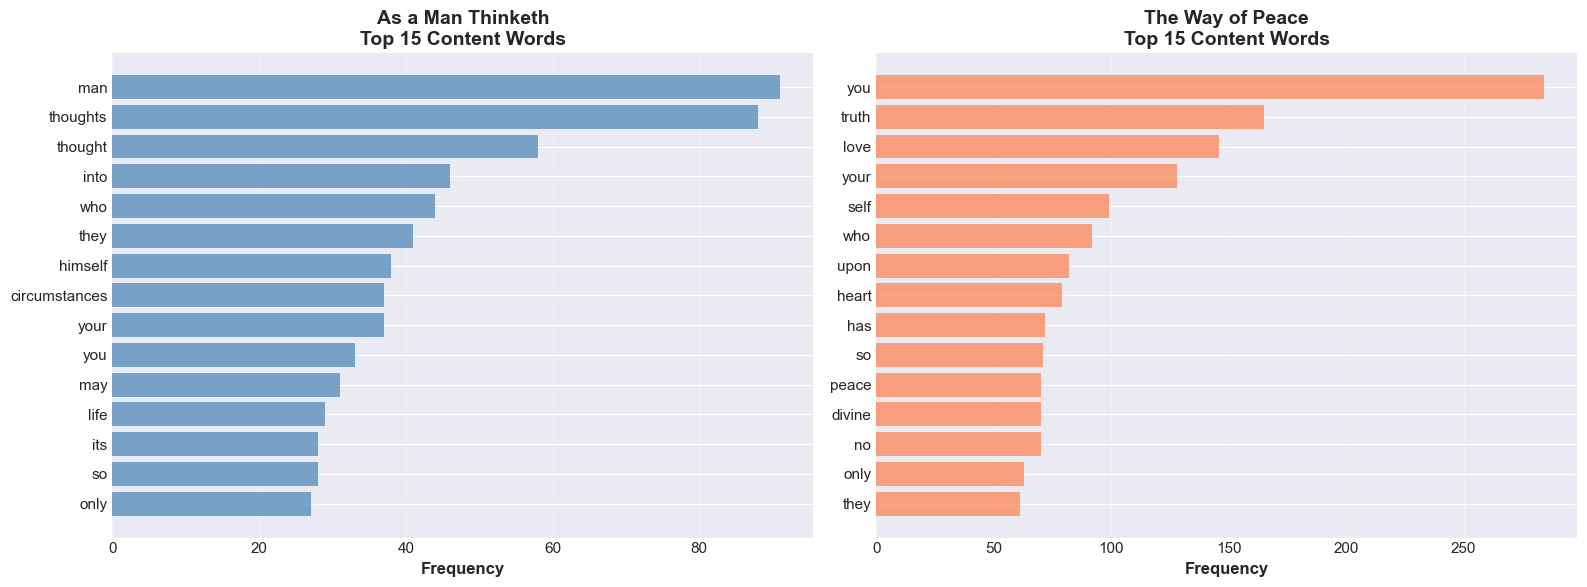

✅ Saved: exploratory_top_words.png


In [28]:
# Compare top 15 content words (excluding common stopwords)
stopwords = {'the', 'and', 'of', 'to', 'in', 'is', 'that', 'it', 'he', 'his', 
             'for', 'as', 'with', 'be', 'this', 'are', 'not', 'but', 'by', 'on',
             'at', 'from', 'or', 'an', 'will', 'all', 'can', 'their', 'which'}

# Filter out stopwords and get top words
top1 = [(w, c) for w, c in counter1.most_common(50) if w not in stopwords][:15]
top2 = [(w, c) for w, c in counter2.most_common(50) if w not in stopwords][:15]

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Book 1
words1, counts1 = zip(*top1)
ax1.barh(words1, counts1, color='steelblue', alpha=0.7)
ax1.set_xlabel('Frequency', fontsize=12, fontweight='bold')
ax1.set_title('As a Man Thinketh\nTop 15 Content Words', fontsize=14, fontweight='bold')
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# Book 2
words2, counts2 = zip(*top2)
ax2.barh(words2, counts2, color='coral', alpha=0.7)
ax2.set_xlabel('Frequency', fontsize=12, fontweight='bold')
ax2.set_title('The Way of Peace\nTop 15 Content Words', fontsize=14, fontweight='bold')
ax2.invert_yaxis()
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/exploratory_top_words.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: exploratory_top_words.png")

## Part 7: Summary and Insights

In [29]:
print("\n" + "="*80)
print("📋 EXPLORATORY ANALYSIS SUMMARY")
print("="*80)

print("\n1️⃣ BOOK COMPARISON:")
print(f"   • Book 1 is {len(book1_raw)/len(book2_raw):.2f}x the length of Book 2")
print(f"   • Book 1 has {len(book1_words):,} words vs Book 2's {len(book2_words):,} words")

print("\n2️⃣ VOCABULARY DIVERSITY:")
print(f"   • Book 1 TTR: {lex_div1['Type-Token Ratio']:.4f}")
print(f"   • Book 2 TTR: {lex_div2['Type-Token Ratio']:.4f}")
if lex_div2['Type-Token Ratio'] > lex_div1['Type-Token Ratio']:
    print("   → Book 2 has MORE diverse vocabulary")
else:
    print("   → Book 1 has MORE diverse vocabulary")

print("\n3️⃣ INITIAL OBSERVATIONS:")
print("   • Different focus words visible in top frequencies")
print("   • Further analysis needed for philosophical differences")

print("\n✅ Ready for detailed linguistic analysis in Notebook 1")
print("="*80)


📋 EXPLORATORY ANALYSIS SUMMARY

1️⃣ BOOK COMPARISON:
   • Book 1 is 0.45x the length of Book 2
   • Book 1 has 7,404 words vs Book 2's 17,023 words

2️⃣ VOCABULARY DIVERSITY:
   • Book 1 TTR: 0.2388
   • Book 2 TTR: 0.1616
   → Book 1 has MORE diverse vocabulary

3️⃣ INITIAL OBSERVATIONS:
   • Different focus words visible in top frequencies
   • Further analysis needed for philosophical differences

✅ Ready for detailed linguistic analysis in Notebook 1
